In [1]:
import os
#Manipulación de Datos
import pandas as pd
import numpy as np
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
#modelos
import sklearn
from sklearn.pipeline import Pipeline #bench
from sklearn.preprocessing import StandardScaler # (x-u)/s
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#Seleccion de modelos
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
#Balanceo
from imblearn.combine import SMOTETomek
#Metricas
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#time
import time
from time import gmtime, strftime
#Export model jobs
import joblib
import pickle

In [2]:
_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time elapsed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [3]:
#Estableciendo el directorio de trabajo
os.chdir(r"D:\A C A D E M Y\ANALYTICS\Facturedo")

In [4]:
#Importando nuestro archivo de trabajo
#train
xtrain = pd.read_csv('train.csv')
#df_xtrain.columns
xtrain.drop('Unnamed: 0', inplace=True, axis=1)  # drop index
ytrain = pd.read_csv('train_label.csv',header=None,names  =["target"])
#test
xtest = pd.read_csv('test.csv')
xtest.drop('Unnamed: 0', inplace=True, axis=1)
ytest = pd.read_csv('test_label.csv',header=None,names  =["target"]) # drop index


In [5]:
xtrain.head(n=3)

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
0,0.00,143270.10,100.0,0.0,0.0,63090564.44,4199850.00,0.0,6240000.0,17.0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,1403461.97,90.0,10.0,29.0,8013913.78,8177030.69,44951.9,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0
2,19800.24,63401.41,100.0,0.0,0.0,323384.60,67610.22,0.0,0.0,4.0,...,1,0,0,0,0,0,0,0,1,0


In [6]:
ytrain.head(n=3)

,target
0,0.0
1,1.0
2,1.0


In [7]:
print('------shape train--------')
print(ytrain.shape)
print(xtrain.shape)
print('------shape test--------')
print(ytest.shape)
print(xtest.shape)

------shape train--------
(2189, 1)
(2189, 71)
------shape test--------
(548, 1)
(548, 71)


In [8]:
#Descripción del dataset
xtrain.select_dtypes('float').describe()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v26,v27,v28,v29,v30,v31,v32,v34,v35,v36
count,2.189000e+03,2.189000e+03,2189.000000,2189.000000,2189.000000,2.189000e+03,2.189000e+03,2.189000e+03,2.189000e+03,2189.000000,...,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000
mean,2.789336e+04,2.498074e+06,87.098675,10.317953,3.608040,7.332287e+07,1.011043e+07,1.126268e+04,2.283687e+06,20.920512,...,1003.878483,0.418084,6.167200,27.775240,2.038374,5.573321,15.669255,34.648241,35.711284,34.118776
std,2.770920e+05,3.713769e+06,29.548930,25.922405,8.477891,3.009257e+08,4.209394e+07,1.540442e+05,3.283374e+06,13.119688,...,2893.457577,2.443169,24.061382,44.799296,8.404936,22.945822,36.359372,37.067513,59.697032,33.230561
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000
25%,0.000000e+00,1.411988e+04,100.000000,0.000000,0.000000,2.898817e+06,0.000000e+00,0.000000e+00,0.000000e+00,11.000000,...,35.000000,-1.288042,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,30.000000
50%,0.000000e+00,1.781006e+05,100.000000,0.000000,0.000000,1.623024e+07,1.970460e+04,0.000000e+00,0.000000e+00,22.000000,...,325.000000,-0.624764,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,31.000000
75%,0.000000e+00,3.958601e+06,100.000000,0.000000,5.000000,3.308427e+07,2.560791e+06,0.000000e+00,4.355600e+06,24.000000,...,675.000000,1.389325,0.000000,100.000000,0.000000,0.000000,0.000000,31.000000,62.000000,31.000000
max,5.030246e+06,1.257078e+07,100.000000,100.000000,183.000000,3.283312e+09,4.415314e+08,2.427617e+06,1.000000e+07,115.000000,...,41382.000000,8.083333,100.000000,100.000000,165.000000,100.000000,100.000000,731.000000,1280.000000,731.000000


In [9]:
xtrain.select_dtypes(exclude='float').describe()

,v33,tcs37,tcs38,tcs39,tcs40,tcs41,tcs42,tc43,tc44,tc45,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,...,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.0
mean,421.936501,0.153495,0.634536,0.135678,0.032435,0.003655,0.021014,0.004568,0.002741,0.009593,...,0.034719,0.371859,0.004111,0.021928,0.004568,0.014619,0.007766,0.044312,0.122430,0.0
std,345.095460,0.360546,0.481670,0.342525,0.177193,0.060357,0.143464,0.067450,0.052294,0.097497,...,0.183109,0.483412,0.064003,0.146481,0.067450,0.120048,0.087803,0.205835,0.327857,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,323.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,723.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1286.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [10]:
# Drop irrelevant columns
xtrain.drop('d70', inplace=True, axis=1)  # d70 dato cte
xtest.drop('d70', inplace=True, axis=1)  # d70 dato cte 

In [11]:
#df_xtrain.info()


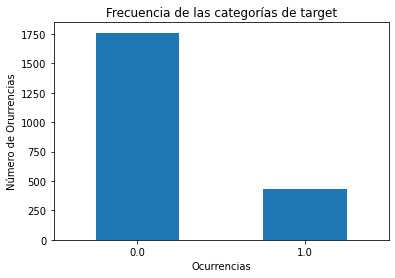

In [12]:
count_classes=pd.value_counts(ytrain['target'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Frecuencia de las categorías de target')
plt.xlabel('Ocurrencias')
plt.ylabel('Número de Orurrencias')
plt.show()

In [13]:
prop=count_classes[1]/count_classes[0]
print(count_classes[1])
print(count_classes[0])
print(prop)

429
1760
0.24375


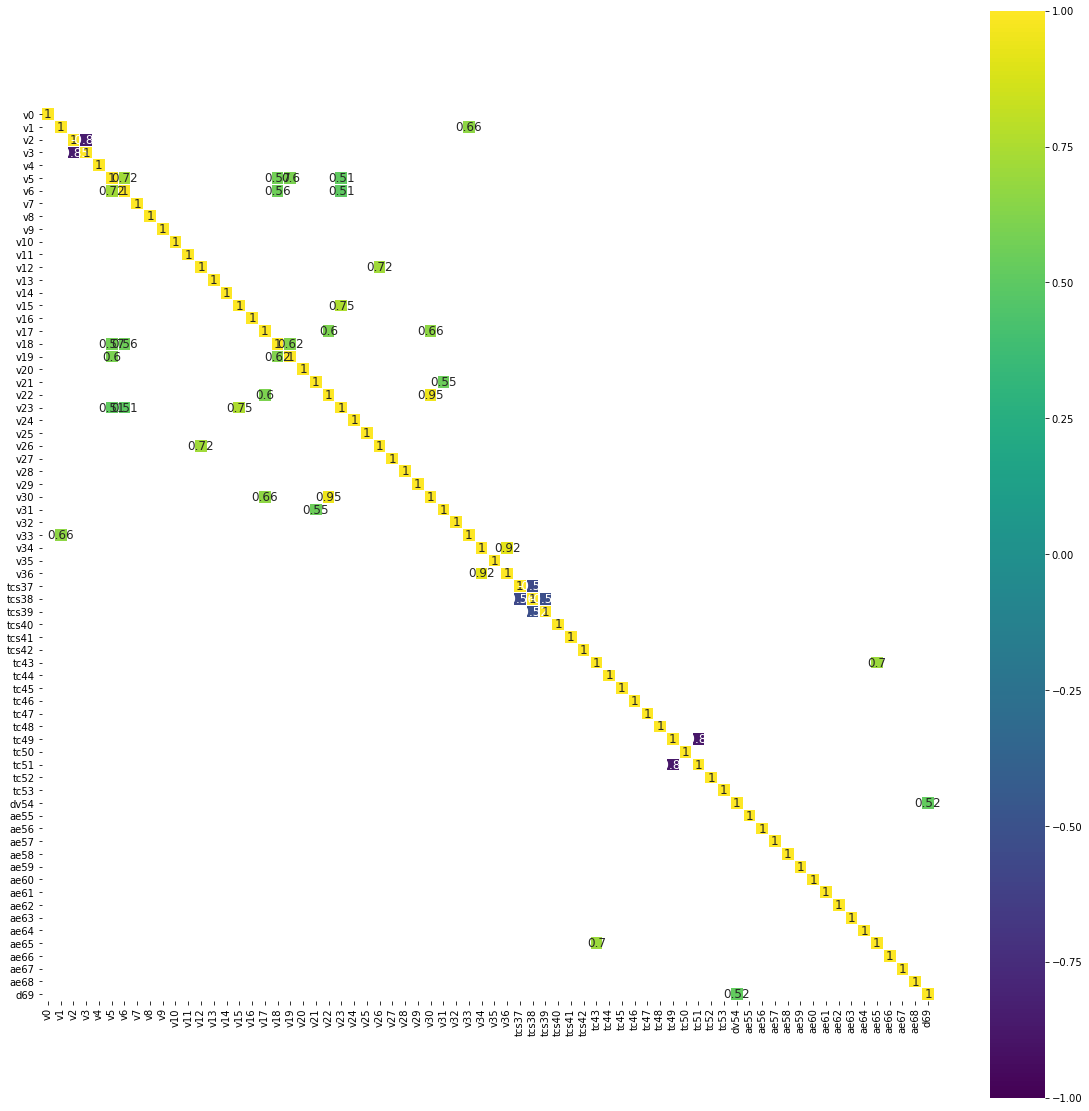

In [14]:
corr = xtrain.corr() #
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

In [15]:
##Dividimos un conjunto de prueba y de testeo en 70%,30%
# No es necesario Dividir los datos

In [16]:
#Balanceo de datos
#Instaciamos una clase SMOTETomek
st=SMOTETomek(sampling_strategy=0.8,
              random_state=2020)
xtrain_st, ytrain_st= st.fit_resample(xtrain,ytrain)

In [17]:
type(xtrain_st)

pandas.core.frame.DataFrame

In [18]:
type(xtrain)

pandas.core.frame.DataFrame

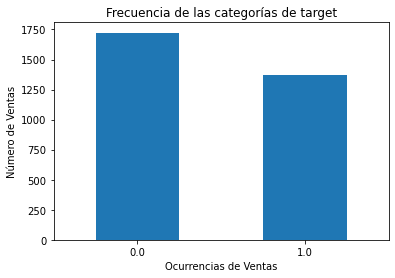

In [19]:
count_classes=pd.value_counts(ytrain_st['target'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Frecuencia de las categorías de target')
plt.xlabel('Ocurrencias de Ventas')
plt.ylabel('Número de Ventas')
plt.show()

In [20]:
prop=count_classes[1]/count_classes[0]
print(count_classes[1])
print(count_classes[0])
print(prop)

1371
1723
0.79570516540917


### Se evalua de manera preliminar la contribucion de las variables

Time elapsed: 0hour:0min:5sec


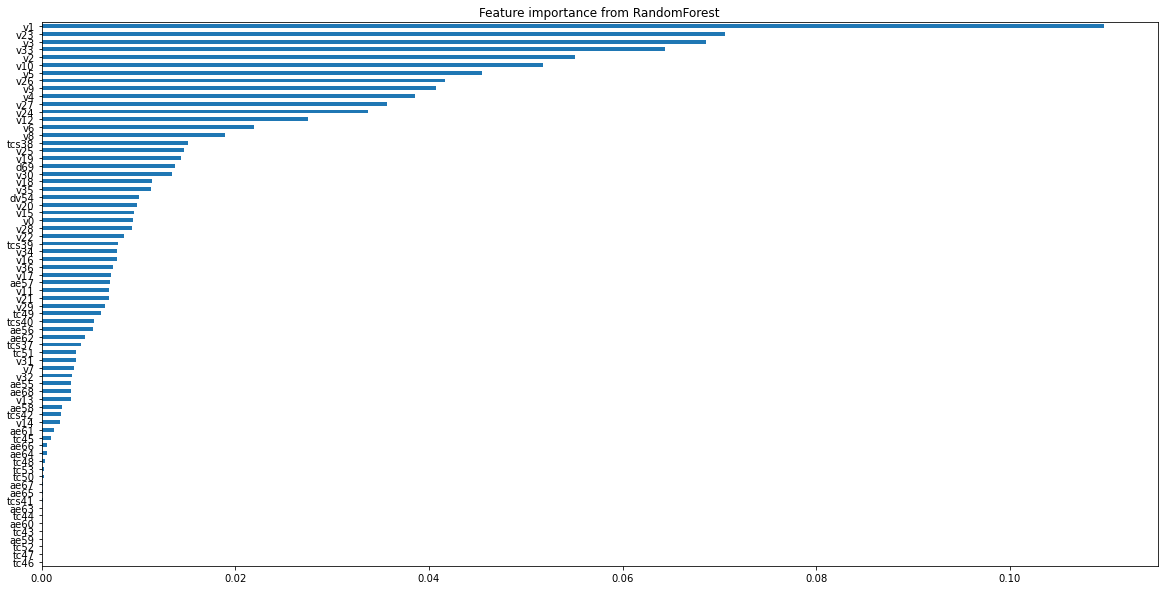

In [21]:
#Contribucion usando RF
tic()

n_colxtrain=xtrain_st.shape[1] # cantidad de columnas
rf_clf = RandomForestClassifier(n_estimators = 1500, max_depth=12)
rf_clf.fit(xtrain_st, ytrain_st)
# Top variables
top_rf=pd.Series(rf_clf.feature_importances_, index = xtrain_st.columns).nlargest(n_colxtrain)
top_rf.plot(kind = 'barh',
figsize = (20, 10),
title = 'Feature importance from RandomForest').invert_yaxis();

tac()

In [22]:
top_rf.nlargest(10)

v1     0.109752
v23    0.070526
v3     0.068601
v33    0.064392
v2     0.055058
v10    0.051761
v5     0.045483
v26    0.041690
v9     0.040728
v4     0.038533
dtype: float64

In [23]:
print('------shape train--------')
print(ytrain.shape)
print(xtrain.shape)
print('------shape test--------')
print(ytest.shape)
print(xtest.shape)

------shape train--------
(2189, 1)
(2189, 70)
------shape test--------
(548, 1)
(548, 70)


## Se analizará con 10 features mas importantes segun RF

In [24]:
features_top_10=list(top_rf.nlargest(10).index)
features_top_10

['v1', 'v23', 'v3', 'v33', 'v2', 'v10', 'v5', 'v26', 'v9', 'v4']

In [25]:
tic()


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression())])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression())])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier())])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier())])

# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1 = 0.0
best_clf = 0
best_gs = ''
best_roc_auc = ''
best_gini = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(xtrain_st[features_top_10], ytrain_st)  # universo data
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(xtest[features_top_10])  # universo data
	# Test data accuracy of model with best params // se usa como criterio de seleccion F1-score
	print('Test set *accuracy* using f1-score score for best params: %.3f ' % f1_score(ytest, y_pred))
	print('Test set *roc_auc* using f1-score score for best params: %.3f ' % roc_auc_score(ytest, y_pred))
	print('Test set *gini* using f1-score score for best params: %.3f ' % (2*roc_auc_score(ytest, y_pred)-1))
	# Track best (highest test f1-score) model
	if f1_score(ytest, y_pred) > best_f1:   # se usa como criterio de seleccion F1-score
		best_f1 = f1_score(ytest, y_pred)
		best_gs = gs     
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file // save model

dump_file = 'best_gs_pipeline_10.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

tac()

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.703
Test set *accuracy* using f1-score score for best params: 0.563 
Test set *roc_auc* using f1-score score for best params: 0.751 
Test set *gini* using f1-score score for best params: 0.501 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.529
Test set *accuracy* using f1-score score for best params: 0.413 
Test set *roc_auc* using f1-score score for best params: 0.634 
Test set *gini* using f1-score score for best params: 0.269 

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4}
Best training accuracy: 0.933
Test set *accuracy* using f1-score score for best params: 0.802 
Test set *roc_auc* using f1-score score for best params: 0

## Se analizará con 20 features mas importantes segun RF

In [26]:
features_top_20=list(top_rf.nlargest(20).index)
print(features_top_20)

['v1', 'v23', 'v3', 'v33', 'v2', 'v10', 'v5', 'v26', 'v9', 'v4', 'v27', 'v24', 'v12', 'v6', 'v8', 'tcs38', 'v25', 'v19', 'd69', 'v30']


In [27]:
strftime("%a, %d %b %Y %H:%M:%S", gmtime())

'Thu, 28 Oct 2021 13:46:39'

In [28]:
tic()


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression())])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression())])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier())])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier())])

# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1 = 0.0
best_clf = 0
best_gs = ''
best_roc_auc = ''
best_gini = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(xtrain_st[features_top_20], ytrain_st)  # universo data
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(xtest[features_top_20])  # universo data
	# Test data accuracy of model with best params // se usa como criterio de seleccion F1-score
	print('Test set *accuracy* using f1-score score for best params: %.3f ' % f1_score(ytest, y_pred))
	print('Test set *roc_auc* using f1-score score for best params: %.3f ' % roc_auc_score(ytest, y_pred))
	print('Test set *gini* using f1-score score for best params: %.3f ' % (2*roc_auc_score(ytest, y_pred)-1))
	# Track best (highest test f1-score) model
	if f1_score(ytest, y_pred) > best_f1:   # se usa como criterio de seleccion F1-score
		best_f1 = f1_score(ytest, y_pred)
		best_gs = gs     
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file // save model

dump_file = 'best_gs_pipeline_20.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

tac()

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.804
Test set *accuracy* using f1-score score for best params: 0.649 
Test set *roc_auc* using f1-score score for best params: 0.813 
Test set *gini* using f1-score score for best params: 0.626 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.438
Test set *accuracy* using f1-score score for best params: 0.325 
Test set *roc_auc* using f1-score score for best params: 0.582 
Test set *gini* using f1-score score for best params: 0.165 

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best training accuracy: 0.939
Test set *accuracy* using f1-score score for best params: 0.805 
Test set *roc_auc* using f1-score score for best params

## Se analizará con 30 features mas importantes segun RF

In [29]:
features_top_30=list(top_rf.nlargest(30).index)
print(features_top_30)

['v1', 'v23', 'v3', 'v33', 'v2', 'v10', 'v5', 'v26', 'v9', 'v4', 'v27', 'v24', 'v12', 'v6', 'v8', 'tcs38', 'v25', 'v19', 'd69', 'v30', 'v18', 'v35', 'dv54', 'v20', 'v15', 'v0', 'v28', 'v22', 'tcs39', 'v34']


In [30]:
tic()


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression())])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression())])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier())])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier())])

# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1 = 0.0
best_clf = 0
best_gs = ''
best_roc_auc = ''
best_gini = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(xtrain_st[features_top_30], ytrain_st)  # universo data
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(xtest[features_top_30])  # universo data
	# Test data accuracy of model with best params // se usa como criterio de seleccion F1-score
	print('Test set *accuracy* using f1-score score for best params: %.3f ' % f1_score(ytest, y_pred))
	print('Test set *roc_auc* using f1-score score for best params: %.3f ' % roc_auc_score(ytest, y_pred))
	print('Test set *gini* using f1-score score for best params: %.3f ' % (2*roc_auc_score(ytest, y_pred)-1))
	# Track best (highest test f1-score) model
	if f1_score(ytest, y_pred) > best_f1:   # se usa como criterio de seleccion F1-score
		best_f1 = f1_score(ytest, y_pred)
		best_gs = gs     
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file // save model

dump_file = 'best_gs_pipeline_30.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

tac()

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.818
Test set *accuracy* using f1-score score for best params: 0.674 
Test set *roc_auc* using f1-score score for best params: 0.836 
Test set *gini* using f1-score score for best params: 0.672 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.466
Test set *accuracy* using f1-score score for best params: 0.302 
Test set *roc_auc* using f1-score score for best params: 0.566 
Test set *gini* using f1-score score for best params: 0.133 

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best training accuracy: 0.938
Test set *accuracy* using f1-score score for best params: 0.826 
Test set *roc_auc* using f1-score score for best params: 0

## Se analizará con 40 features mas importantes segun RF

In [31]:
features_top_40=list(top_rf.nlargest(40).index)
print(features_top_40)

['v1', 'v23', 'v3', 'v33', 'v2', 'v10', 'v5', 'v26', 'v9', 'v4', 'v27', 'v24', 'v12', 'v6', 'v8', 'tcs38', 'v25', 'v19', 'd69', 'v30', 'v18', 'v35', 'dv54', 'v20', 'v15', 'v0', 'v28', 'v22', 'tcs39', 'v34', 'v16', 'v36', 'v17', 'ae57', 'v11', 'v21', 'v29', 'tc49', 'tcs40', 'ae56']


In [32]:
tic()


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression())])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression())])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier())])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier())])

# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1 = 0.0
best_clf = 0
best_gs = ''
best_roc_auc = ''
best_gini = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(xtrain_st[features_top_40], ytrain_st)  # universo data
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(xtest[features_top_40])  # universo data
	# Test data accuracy of model with best params // se usa como criterio de seleccion F1-score
	print('Test set *accuracy* using f1-score score for best params: %.3f ' % f1_score(ytest, y_pred))
	print('Test set *roc_auc* using f1-score score for best params: %.3f ' % roc_auc_score(ytest, y_pred))
	print('Test set *gini* using f1-score score for best params: %.3f ' % (2*roc_auc_score(ytest, y_pred)-1))
	# Track best (highest test f1-score) model
	if f1_score(ytest, y_pred) > best_f1:   # se usa como criterio de seleccion F1-score
		best_f1 = f1_score(ytest, y_pred)
		best_gs = gs     
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file // save model

dump_file = 'best_gs_pipeline_40.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

tac()

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.826
Test set *accuracy* using f1-score score for best params: 0.687 
Test set *roc_auc* using f1-score score for best params: 0.846 
Test set *gini* using f1-score score for best params: 0.693 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.417
Test set *accuracy* using f1-score score for best params: 0.287 
Test set *roc_auc* using f1-score score for best params: 0.563 
Test set *gini* using f1-score score for best params: 0.125 

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}
Best training accuracy: 0.938
Test set *accuracy* using f1-score score for best params: 0.826 
Test set *roc_auc* using f1-score score for best params: 0

In [33]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


## Cargamos el/los modelos generados para ponerlos en produccion

In [34]:
# Carga de modelos
#Cargamos el modelo de 10 features
filename_model_10 = "best_gs_pipeline_10.pkl"
model_10=joblib.load(filename_model_10)
#Cargamos el modelo de 20 features
filename_model_20 = "best_gs_pipeline_20.pkl"  ## modelo Recomendado //Champion
model_20=joblib.load(filename_model_20)
#Cargamos el modelo de 30 features
filename_model_30 = "best_gs_pipeline_30.pkl"
model_30=joblib.load(filename_model_30)
#Cargamos el modelo de 40 features
filename_model_40 = "best_gs_pipeline_40.pkl"
model_40=joblib.load(filename_model_40)

In [35]:
#Definimos la funcion de predicion
def model_prediction(x_in, model):
    x = pd.DataFrame(np.asarray(x_in).reshape(1,-1))
    preds=model.predict(x)
    ##
    if preds == 0:
        pred = 'Pagador'
    else:
        pred = 'No Pagador'
    return pred 

In [36]:
#Prediccion de nuevos datos para 10 principales features
#x10=np.array([120000, 1, 310310, 120, 640,200,63000000,1000,25,0])
#model_prediction(x10, model_10)

In [37]:
#Prediccion de nuevos datos para 20 principales features

x20=np.array([140000, 12, 1, 200, 500,80,7800000,1300,10,30,1,10,6000000,7900000,0,0,4,0,1,0])
model_prediction(x20, model_20)

'No Pagador'

## Conclusiones
Sugiero implementar el modelo generado(Bosque Aletorio) usando las 20 principales features por los siguientes motivos :
1. Posee el **F1-score** de 0.833 y **Gini** de 0.804 mas alto con la menor cantidad de features.
2. Es un modelo que mantiene su poder predictivo uso usando el 28.86% del total de features iniciales.
3. El costo computacional es realivamente bajo comparado con otros modelos. Se evaluó SVM, pero el tiempo de proceso tomó mas de un dia
4. La implementacion en APIs/Web server es mas sencilla, no se tiene de desarrollar el total de inputs de modelo
5. A nivel de usuario, es mas sencillo completar un formulario con 20 datos que un formulario con 70.